## IMPORT THƯ VIỆN VÀ DATASET

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.set(rc = {'figure.figsize':(10,7)})

In [2]:
df = pd.read_csv("/Users/baoan/Desktop/MarketingData_final.csv")
df

,User_ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_Enroll,Recency,MntWines,...,Num_StorePur,Num_WebVisitsMonth,Acpt_Cmp3,Acpt_Cmp4,Acpt_Cmp5,Acpt_Cmp1,Acpt_Cmp2,Complain,Response,Country
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,...,4,7,0,0,0,0,0,0,1,Spain
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,...,2,5,0,0,0,0,0,0,0,Canada
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,...,10,4,0,0,0,0,0,0,0,United States
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,...,4,6,0,0,0,0,0,0,0,Australia
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,...,6,5,0,0,0,0,0,0,0,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709.0,...,4,5,0,0,0,0,0,0,0,United States
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406.0,...,5,7,0,0,0,1,0,0,0,Spain
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908.0,...,13,6,0,1,0,0,0,0,0,Spain
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428.0,...,10,3,0,0,0,0,0,0,0,India


## TIỀN XỬ LÝ DATASET

### Chuyển từ kiểu object sang số

In [32]:
# Kiểm tra các giá trị có trong Education
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [33]:
# Kiểm tra các giá trị có trong Marital_Status
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [34]:
# Kiểm tra các giá trị có trong Country
df.Country.value_counts()

Spain            1095
South Africa      337
Canada            268
Australia         160
India             148
Germany           120
United States     109
Montenegro          3
Name: Country, dtype: int64

In [35]:
# Chuyển đổi sang dạng số
mar_type_Education = {'Graduation': 0, 'PhD':1, 'Master':2 , '2n Cycle':3, 'Basic':4}
mar_type_Marital_Status = {'Married': 0, 'Together':1, 'Single':2 , 'Divorced':3, 'Widow':4, 'Alone':5, 'Absurd':6, 'YOLO':7}
mar_Country = {'Spain': 0, 'South Africa':1, 'Canada':2 , 'Australia':3, 'India':4, 'Germany':5, 'United States':6, 'Montenegro':7}
df.Education = df.Education.map(mar_type_Education)
df.Marital_Status = df.Marital_Status.map(mar_type_Marital_Status)
df.Country = df.Country.map(mar_Country)

### Kiểm tra và xóa các giá trị null

In [36]:
# Đếm số lượng null của từng thuộc tính
df.isnull().sum()

User_ID                0
Year_Birth             0
Education              0
Marital_Status         0
Income                24
Kidhome                0
Teenhome               0
Date_Enroll            0
Recency                0
MntWines               0
MntFruits              0
Mnt_Meats              0
Mnt_Fishs              0
Mnt_Sweets             0
Mnt_Golds              0
Num_DealsPur           0
Num_WebPur             0
Num_CatalogPur         0
Num_StorePur           0
Num_WebVisitsMonth     0
Acpt_Cmp3              0
Acpt_Cmp4              0
Acpt_Cmp5              0
Acpt_Cmp1              0
Acpt_Cmp2              0
Complain               0
Response               0
Country                0
dtype: int64

In [37]:
# Xóa các hàng có giá null của từng thuộc tính
df.dropna(axis=0, how='any', inplace = True)

In [38]:
# Kiểm tra lại số lượng các giá trị null
df.isnull().sum().sum()

0

In [39]:
# Xóa thuộc tính Date_Enroll
df.drop(['Date_Enroll'], axis=1, inplace=True)

In [40]:
# Kiểm tra lại toàn bộ kiểu dữ liệu của các thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             2216 non-null   int64  
 1   Year_Birth          2216 non-null   int64  
 2   Education           2216 non-null   int64  
 3   Marital_Status      2216 non-null   int64  
 4   Income              2216 non-null   float64
 5   Kidhome             2216 non-null   int64  
 6   Teenhome            2216 non-null   int64  
 7   Recency             2216 non-null   int64  
 8   MntWines            2216 non-null   float64
 9   MntFruits           2216 non-null   float64
 10  Mnt_Meats           2216 non-null   float64
 11  Mnt_Fishs           2216 non-null   float64
 12  Mnt_Sweets          2216 non-null   float64
 13  Mnt_Golds           2216 non-null   float64
 14  Num_DealsPur        2216 non-null   int64  
 15  Num_WebPur          2216 non-null   int64  
 16  Num_Ca

## PHÂN LỚP DATASET

### Tách nhóm có giám sát

In [41]:
# Xem tên các cột của data
df.columns

Index(['User_ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'Mnt_Meats',
       'Mnt_Fishs', 'Mnt_Sweets', 'Mnt_Golds', 'Num_DealsPur', 'Num_WebPur',
       'Num_CatalogPur', 'Num_StorePur', 'Num_WebVisitsMonth', 'Acpt_Cmp3',
       'Acpt_Cmp4', 'Acpt_Cmp5', 'Acpt_Cmp1', 'Acpt_Cmp2', 'Complain',
       'Response', 'Country'],
      dtype='object')

In [42]:
# Lưu Response vào output
output = df['Response']

In [43]:
# Tách theo nhóm Mnt: Tổng số tiền khách hàng phải chi trả cho các mặt hàng trong 2 năm gần nhất.
df_Mnt = df[df.columns[8:13]]
df_Mnt.head(5)

,MntWines,MntFruits,Mnt_Meats,Mnt_Fishs,Mnt_Sweets
0,635.0,88.0,546.0,172.0,88.0
1,11.0,1.0,6.0,2.0,1.0
2,426.0,49.0,127.0,111.0,21.0
3,11.0,4.0,20.0,10.0,3.0
4,173.0,43.0,118.0,46.0,27.0


In [44]:
# Tách theo nhóm Num: Số lượng đơn hàng mà khách hàng đã thanh toán
df_Num = df[df.columns[14:18]]
df_Num.head(5)

,Num_DealsPur,Num_WebPur,Num_CatalogPur,Num_StorePur
0,3,8,10,4
1,2,1,1,2
2,1,8,2,10
3,2,2,0,4
4,5,5,3,6


In [45]:
# Tách theo nhóm Acpt: Khách hàng phản hồi cho chiến dịch Marketing Campaign
df_Acpt = df[df.columns[19:24]]
df_Acpt.head(5)

,Acpt_Cmp3,Acpt_Cmp4,Acpt_Cmp5,Acpt_Cmp1,Acpt_Cmp2
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [46]:
# Tách theo nhóm các thông tin còn lại của khách hành
df_info = df.copy()
df_info.drop(df.columns[8:24], axis=1, inplace=True)
df_info.drop(['User_ID', 'Response'], axis=1, inplace=True)
df_info.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Country
0,1957,0,2,58138.0,0,0,58,0,0
1,1954,0,2,46344.0,1,1,38,0,2
2,1965,0,1,71613.0,0,0,26,0,6
3,1984,0,1,26646.0,1,0,26,0,3
4,1981,1,0,58293.0,1,0,94,0,0


## ÁP DỤNG MODEL MACHINE LEARNING CHO CÁC DATASET

### Tạo tập Train và Test cho các lớp đã phân

In [47]:
# Tạo tập train và test cho các nhóm

X_train_Mnt, X_test_Mnt, y_train_Mnt, y_test_Mnt = train_test_split(df_Mnt, output, test_size=0.2, random_state=100)
X_train_Num, X_test_Num, y_train_Num, y_test_Num = train_test_split(df_Num, output, test_size=0.2, random_state=100)
X_train_Acpt, X_test_Acpt, y_train_Acpt, y_test_Acpt = train_test_split(df_Acpt, output, test_size=0.2, random_state=100)
X_train_info, X_test_info, y_train_info, y_test_info = train_test_split(df_info, output, test_size=0.2, random_state=100)

### Random Forest

#### Test độ ảnh hưởng của các nhóm đã phân so với Output

In [48]:
# Đưa tập train của các nhóm vào mô hình

rf_model_Mnt = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model_Num = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model_Acpt = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model_info = RandomForestClassifier(n_estimators=100, random_state=0)

rf_model_Mnt.fit(X_train_Mnt, y_train_Mnt)
rf_model_Num.fit(X_train_Num, y_train_Num)
rf_model_Acpt.fit(X_train_Acpt, y_train_Acpt)
rf_model_info.fit(X_train_info, y_train_info)

RandomForestClassifier(random_state=0)

In [49]:
# Độ chính xác theo từng nhóm cho mô hình Random Forest theo mức độ giảm dần

rf_accuracy_Mnt = rf_model_Mnt.score(X_test_Mnt, y_test_Mnt)
rf_accuracy_Num = rf_model_Num.score(X_test_Num, y_test_Num)
rf_accuracy_Acpt = rf_model_Acpt.score(X_test_Acpt, y_test_Acpt)
rf_accuracy_info = rf_model_info.score(X_test_info, y_test_info)

rf_accuracies = [
    ("Accuracy Mnt:", rf_accuracy_Mnt),
    ("Accuracy Num:", rf_accuracy_Num),
    ("Accuracy Acpt:", rf_accuracy_Acpt),
    ("Accuracy info:", rf_accuracy_info)
]

sorted_accuracies = sorted(rf_accuracies, key=lambda x: x[1], reverse=True)
for rf_accuracy in sorted_accuracies:
    print(rf_accuracy[0], rf_accuracy[1])

Accuracy Acpt: 0.8918918918918919
Accuracy info: 0.8828828828828829
Accuracy Mnt: 0.8648648648648649
Accuracy Num: 0.8220720720720721


#### Test với các thuộc tính của nhóm có độ ảnh hưởng cao nhất với Output

In [50]:
df_Acpt.columns

Index(['Acpt_Cmp3', 'Acpt_Cmp4', 'Acpt_Cmp5', 'Acpt_Cmp1', 'Acpt_Cmp2'], dtype='object')

In [51]:
Acpt_Cmp1 = df_Acpt.Acpt_Cmp1.to_frame()
Acpt_Cmp2 = df_Acpt.Acpt_Cmp2.to_frame()
Acpt_Cmp3 = df_Acpt.Acpt_Cmp3.to_frame()
Acpt_Cmp4 = df_Acpt.Acpt_Cmp4.to_frame()
Acpt_Cmp5 = df_Acpt.Acpt_Cmp5.to_frame()

In [52]:

X_train_Acpt_Cmp1, X_test_Acpt_Cmp1, y_train_Acpt_Cmp1, y_test_Acpt_Cmp1 = train_test_split(Acpt_Cmp1, output, test_size=0.2, random_state=100)
X_train_Acpt_Cmp2, X_test_Acpt_Cmp2, y_train_Acpt_Cmp2, y_test_Acpt_Cmp2 = train_test_split(Acpt_Cmp2, output, test_size=0.2, random_state=100)
X_train_Acpt_Cmp3, X_test_Acpt_Cmp3, y_train_Acpt_Cmp3, y_test_Acpt_Cmp3 = train_test_split(Acpt_Cmp3, output, test_size=0.2, random_state=100)
X_train_Acpt_Cmp4, X_test_Acpt_Cmp4, y_train_Acpt_Cmp4, y_test_Acpt_Cmp4 = train_test_split(Acpt_Cmp4, output, test_size=0.2, random_state=100)
X_train_Acpt_Cmp5, X_test_Acpt_Cmp5, y_train_Acpt_Cmp5, y_test_Acpt_Cmp5 = train_test_split(Acpt_Cmp5, output, test_size=0.2, random_state=100)


In [53]:
rf_model_Acpt_Cmp1 = RandomForestClassifier(n_estimators=3, random_state=0)
rf_model_Acpt_Cmp2 = RandomForestClassifier(n_estimators=3, random_state=0)
rf_model_Acpt_Cmp3 = RandomForestClassifier(n_estimators=3, random_state=0)
rf_model_Acpt_Cmp4 = RandomForestClassifier(n_estimators=3, random_state=0)
rf_model_Acpt_Cmp5 = RandomForestClassifier(n_estimators=3, random_state=0)

rf_model_Acpt_Cmp1.fit(X_train_Acpt_Cmp1, y_train_Acpt_Cmp1)
rf_model_Acpt_Cmp2.fit(X_train_Acpt_Cmp2, y_train_Acpt_Cmp2)
rf_model_Acpt_Cmp3.fit(X_train_Acpt_Cmp3, y_train_Acpt_Cmp3)
rf_model_Acpt_Cmp4.fit(X_train_Acpt_Cmp4, y_train_Acpt_Cmp4)
rf_model_Acpt_Cmp5.fit(X_train_Acpt_Cmp5, y_train_Acpt_Cmp5)

RandomForestClassifier(n_estimators=3, random_state=0)

In [54]:
# Độ chính xác theo từng thuộc tính của nhóm Acpt cho mô hình Random Forest theo mức độ giảm dần

rf_accuracy_Acpt_Cmp1 = rf_model_Acpt_Cmp1.score(X_test_Acpt_Cmp1, y_test_Acpt_Cmp1)
rf_accuracy_Acpt_Cmp2 = rf_model_Acpt_Cmp2.score(X_test_Acpt_Cmp2, y_test_Acpt_Cmp2)
rf_accuracy_Acpt_Cmp3 = rf_model_Acpt_Cmp3.score(X_test_Acpt_Cmp3, y_test_Acpt_Cmp3)
rf_accuracy_Acpt_Cmp4 = rf_model_Acpt_Cmp4.score(X_test_Acpt_Cmp4, y_test_Acpt_Cmp4)
rf_accuracy_Acpt_Cmp5 = rf_model_Acpt_Cmp5.score(X_test_Acpt_Cmp5, y_test_Acpt_Cmp5)

rf_accuracies_Acpt = [
    ("Accuracy Acpt.Cmp1:", rf_accuracy_Acpt_Cmp1),
    ("Accuracy Acpt.Cmp2:", rf_accuracy_Acpt_Cmp2),
    ("Accuracy Acpt.Cmp3:", rf_accuracy_Acpt_Cmp3),
    ("Accuracy Acpt.Cmp4:", rf_accuracy_Acpt_Cmp4),
    ("Accuracy Acpt.Cmp5:", rf_accuracy_Acpt_Cmp5)
   
]

sorted_accuracies_Acpt = sorted(rf_accuracies_Acpt, key=lambda x: x[1], reverse=True)
for rf_accuracy_Acpt in sorted_accuracies_Acpt:
    print(rf_accuracy_Acpt[0], rf_accuracy_Acpt[1])

Accuracy Acpt.Cmp2: 0.8693693693693694
Accuracy Acpt.Cmp1: 0.8671171171171171
Accuracy Acpt.Cmp3: 0.8648648648648649
Accuracy Acpt.Cmp4: 0.8648648648648649
Accuracy Acpt.Cmp5: 0.8648648648648649


### Decision Tree

#### Test độ ảnh hưởng của các nhóm đã phân so với Output

In [55]:
# Đưa tập train của các nhóm vào mô hình

dt_model_Mnt = DecisionTreeClassifier(random_state=0)
dt_model_Num = DecisionTreeClassifier(random_state=0)
dt_model_Acpt = DecisionTreeClassifier(random_state=0)
dt_model_info = DecisionTreeClassifier(random_state=0)

dt_model_Mnt.fit(X_train_Mnt, y_train_Mnt)
dt_model_Num.fit(X_train_Num, y_train_Num)
dt_model_Acpt.fit(X_train_Acpt, y_train_Acpt)
dt_model_info.fit(X_train_info, y_train_info)

DecisionTreeClassifier(random_state=0)

In [56]:
# Độ chính xác theo từng nhóm cho mô hình Decision Tree

dt_accuracy_Mnt = dt_model_Mnt.score(X_test_Mnt, y_test_Mnt)
dt_accuracy_Num = dt_model_Num.score(X_test_Num, y_test_Num)
dt_accuracy_Acpt = dt_model_Acpt.score(X_test_Acpt, y_test_Acpt)
dt_accuracy_info = dt_model_info.score(X_test_info, y_test_info)

dt_accuracies = [
    ("Accuracy Mnt:", dt_accuracy_Mnt),
    ("Accuracy Num:", dt_accuracy_Num),
    ("Accuracy Acpt:", dt_accuracy_Acpt),
    ("Accuracy info:", dt_accuracy_info)
]

sorted_accuracies = sorted(dt_accuracies, key=lambda x: x[1], reverse=True)
for dt_accuracy in sorted_accuracies:
    print(dt_accuracy[0], dt_accuracy[1])

Accuracy Acpt: 0.8918918918918919
Accuracy Num: 0.831081081081081
Accuracy info: 0.8175675675675675
Accuracy Mnt: 0.8063063063063063


#### Test với thuộc tính của nhóm có độ ảnh hưởng cao nhất so với Output

In [57]:
dt_model_Acpt_Cmp1 = DecisionTreeClassifier(random_state=0)
dt_model_Acpt_Cmp2 = DecisionTreeClassifier(random_state=0)
dt_model_Acpt_Cmp3 = DecisionTreeClassifier(random_state=0)
dt_model_Acpt_Cmp4 = DecisionTreeClassifier(random_state=0)
dt_model_Acpt_Cmp5 = DecisionTreeClassifier(random_state=0)

dt_model_Acpt_Cmp1.fit(X_train_Acpt_Cmp1, y_train_Acpt_Cmp1)
dt_model_Acpt_Cmp2.fit(X_train_Acpt_Cmp2, y_train_Acpt_Cmp2)
dt_model_Acpt_Cmp3.fit(X_train_Acpt_Cmp3, y_train_Acpt_Cmp3)
dt_model_Acpt_Cmp4.fit(X_train_Acpt_Cmp4, y_train_Acpt_Cmp4)
dt_model_Acpt_Cmp5.fit(X_train_Acpt_Cmp5, y_train_Acpt_Cmp5)

DecisionTreeClassifier(random_state=0)

In [58]:
# Độ chính xác theo từng thuộc tính của nhóm Acpt cho mô hình Decision Trê theo mức độ giảm dần

dt_accuracy_Acpt_Cmp1 = dt_model_Acpt_Cmp1.score(X_test_Acpt_Cmp1, y_test_Acpt_Cmp1)
dt_accuracy_Acpt_Cmp2 = dt_model_Acpt_Cmp2.score(X_test_Acpt_Cmp2, y_test_Acpt_Cmp2)
dt_accuracy_Acpt_Cmp3 = dt_model_Acpt_Cmp3.score(X_test_Acpt_Cmp3, y_test_Acpt_Cmp3)
dt_accuracy_Acpt_Cmp4 = dt_model_Acpt_Cmp4.score(X_test_Acpt_Cmp4, y_test_Acpt_Cmp4)
dt_accuracy_Acpt_Cmp5 = dt_model_Acpt_Cmp5.score(X_test_Acpt_Cmp5, y_test_Acpt_Cmp5)

dt_accuracies_Acpt = [
    ("Accuracy Acpt.Cmp1:", dt_accuracy_Acpt_Cmp1),
    ("Accuracy Acpt.Cmp2:", dt_accuracy_Acpt_Cmp2),
    ("Accuracy Acpt.Cmp3:", dt_accuracy_Acpt_Cmp3),
    ("Accuracy Acpt.Cmp4:", dt_accuracy_Acpt_Cmp4),
    ("Accuracy Acpt.Cmp5:", dt_accuracy_Acpt_Cmp5)
   
]

sorted_accuracies_Acpt = sorted(dt_accuracies_Acpt, key=lambda x: x[1], reverse=True)
for dt_accuracy_Acpt in sorted_accuracies_Acpt:
    print(dt_accuracy_Acpt[0], dt_accuracy_Acpt[1])

Accuracy Acpt.Cmp5: 0.8806306306306306
Accuracy Acpt.Cmp2: 0.8693693693693694
Accuracy Acpt.Cmp1: 0.8671171171171171
Accuracy Acpt.Cmp3: 0.8648648648648649
Accuracy Acpt.Cmp4: 0.8648648648648649


## NHẬN XÉT KẾT QUẢ BẰNG BIỂU ĐỒ

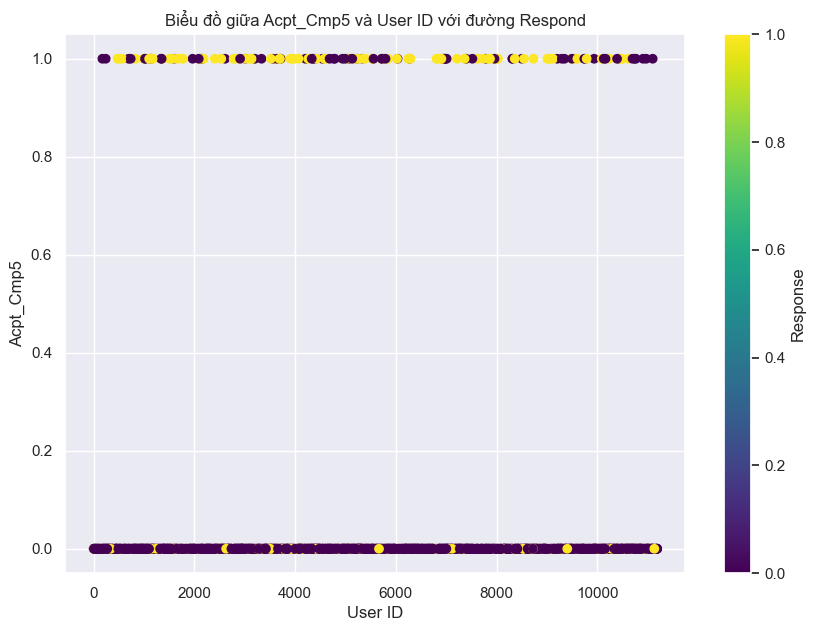

In [9]:
acpt_cmp5 = df['Acpt_Cmp5']
user_id = df['User_ID']
response = df['Response']

plt.scatter(user_id, acpt_cmp5, c=response, cmap='viridis')
plt.colorbar(label='Response')
plt.xlabel('User ID')
plt.ylabel('Acpt_Cmp5')
plt.title('Biểu đồ giữa Acpt_Cmp5 và User ID với đường Respond')
plt.show()